In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Qu'est-ce qu'un ECG

Un ECG est un électrocardiogramme, c'est un test médical qui enregistre l'activité du cœur.

Le fonctionnement de cette examen consiste à placer des electrodes sur la peau.
Les électrodes captent les impulsions électriques du coeur.

Les électrodes détectent les signaux électriques émisent par les contractions cardiaque et les transmettent à un appareil qui les trace sous forme de courbes.

In [28]:

# Chargement des datasets
train_data = pd.read_csv('mitbih_train.csv', header=None)
test_data = pd.read_csv('mitbih_test.csv', header=None)

# Fusion des datasets
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Affichage des premières lignes
print(data.head())
print(data.shape)


        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

## Fréquence d'échantillionnage des données

Les données sont échantillonnées en 187 classes + 1 classe pour labelisé

Series([], dtype: int64)


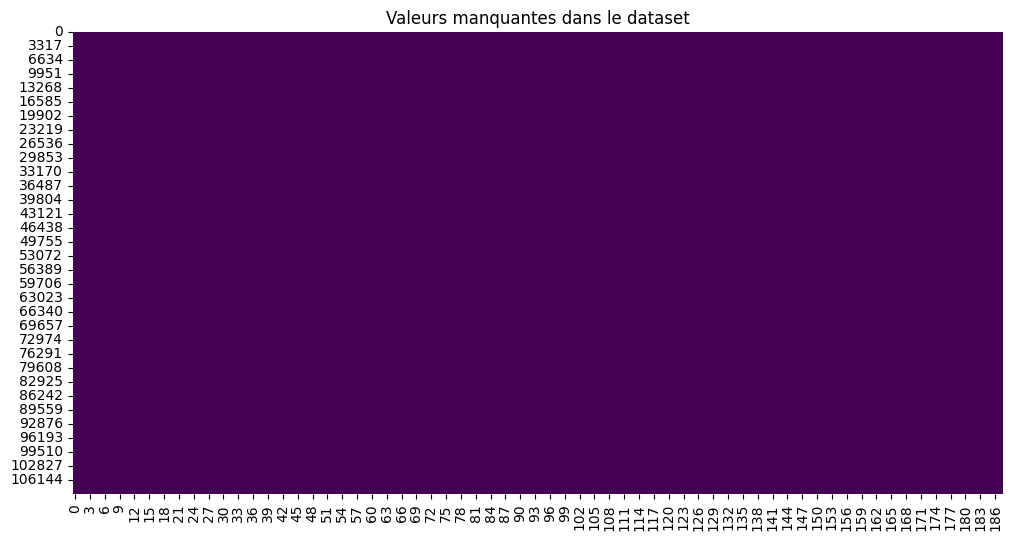

In [29]:
# Vérification des valeurs manquantes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Visualisation des valeurs manquantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le dataset')
plt.show()


In [30]:
# Suppression des lignes avec des valeurs manquantes (si nécessaire)
data_cleaned = data.dropna()

# Vérification après suppression
print(data_cleaned.isnull().sum())
print(data_cleaned.shape)


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
(109446, 188)


In [31]:
# Vérification et suppression des doublons
data_no_duplicates = data_cleaned.drop_duplicates()
print(data_no_duplicates.shape)


(109446, 188)


In [32]:
class_counts = data.iloc[:, -1].value_counts().sort_index()

# Affichage des résultats
print("Nombre d'ECG par classe :")
print(class_counts)

Nombre d'ECG par classe :
187
0.0    90589
1.0     2779
2.0     7236
3.0      803
4.0     8039
Name: count, dtype: int64


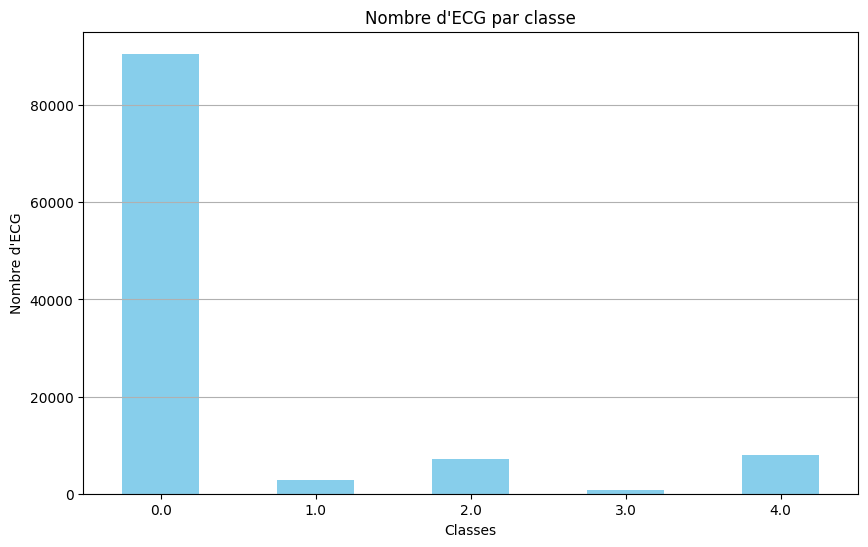

In [33]:
# Visualisation des occurrences par classe
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'ECG par classe')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'ECG')
plt.xticks(rotation=0)  # Rotation des labels de classe
plt.grid(axis='y')
plt.show()


In [34]:
# Afficher les premières lignes du dataset pour comprendre la structure
print(data.head())




        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

## Type de maladie cardiaque par classe

0 : Normal

1 : Supreventricular etctopic beat

2 : Ventricular ectopic beat

3 : Fusion beat

4 : Inconnu

• Normal : Patient avec un coeur sain


• Supreventricular Etctopic Beat : Battement cardiaque prématuré provenant des oreillettes perçu comme des 

palpitations.

Cela peut augmenter le risque d’AVC ou d’insuffisance cardiaque si l’arythmie devient persistante


• Ventricular Ectopic Beat : Battement cardiaque anormal qui prend naissance dans les ventricules, souvent perçu 

comme une palpitation.

Le risque principale est que la maladie évolue en arythmies plus graves, comme la tachycardie ventriculaire ou même 

la fibrillation ventriculaire.


• Fusion Beat : Battement cardiaque issu de la fusion d'un battement normal et d'un battement ectopique (anormal), 

résultant en une contraction combinée qui peut refléter un rythme cardiaque perturbé.

S'il est fréquent, il peut indiquer un problème sous-jacent de conduction cardiaque ou être un signe d’arythmie 

ventriculaire naissante.


• Inconnu : Maladie inconnu

In [35]:
classes = data.iloc[:, -1]

In [36]:
class_counts = classes.value_counts(normalize=True) * 100


In [37]:
labels = ["Normal", "Supraventricular Ectopic Beat", "Ventricular Ectopic Beat", "Fusion Beat", "Unknown"]


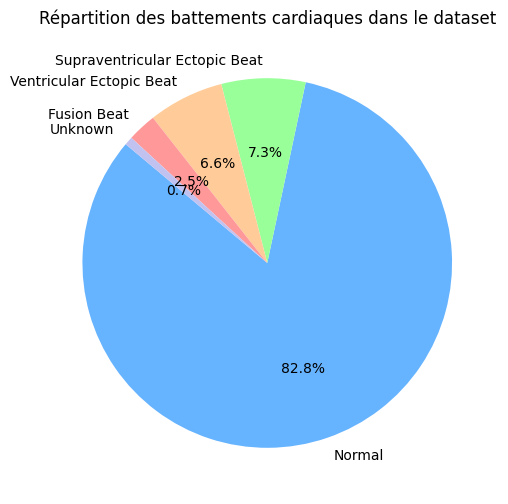

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title("Répartition des battements cardiaques dans le dataset")
plt.show()

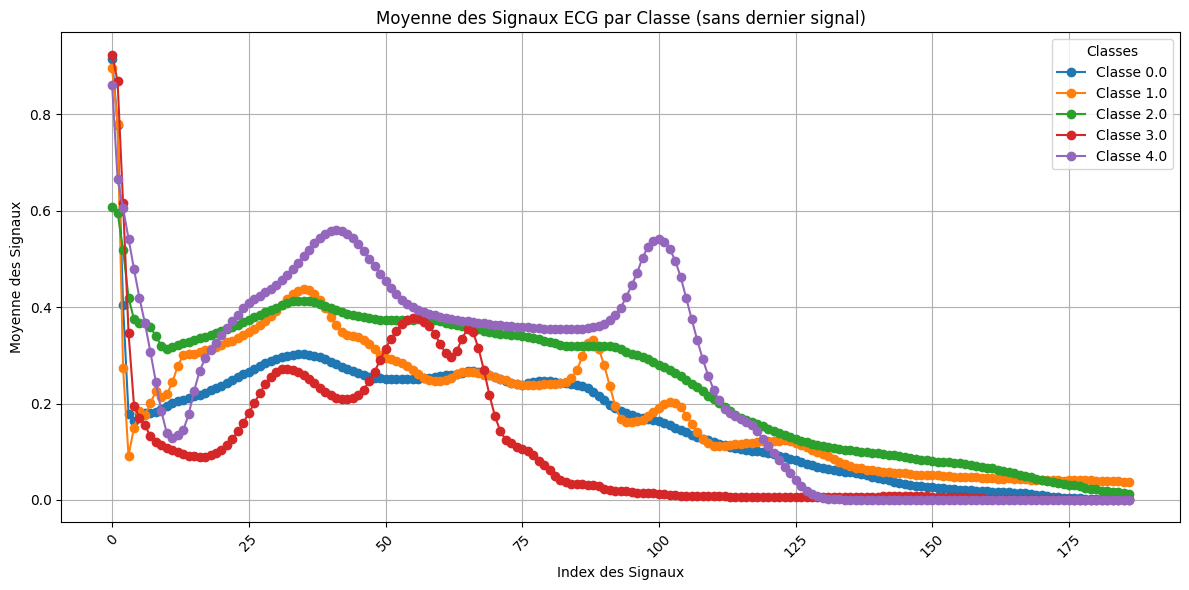

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données (assurez-vous que vos données sont déjà chargées)
# data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Supposons que la dernière colonne (label) contient les classes
labels = data.iloc[:, -1]

# Calcul de la moyenne des signaux par classe, en excluant la dernière colonne
mean_signals = data.iloc[:, :-1].groupby(labels).mean()  # Exclut la dernière colonne pour le calcul des moyennes

# Configuration de la figure
plt.figure(figsize=(12, 6))

# Tracer une courbe pour chaque classe
for class_label in mean_signals.index:
    plt.plot(mean_signals.columns, mean_signals.loc[class_label], marker='o', label=f'Classe {class_label}')

plt.title('Moyenne des Signaux ECG par Classe (sans dernier signal)')
plt.xlabel('Index des Signaux')
plt.ylabel('Moyenne des Signaux')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Classes')
plt.tight_layout()
plt.show()


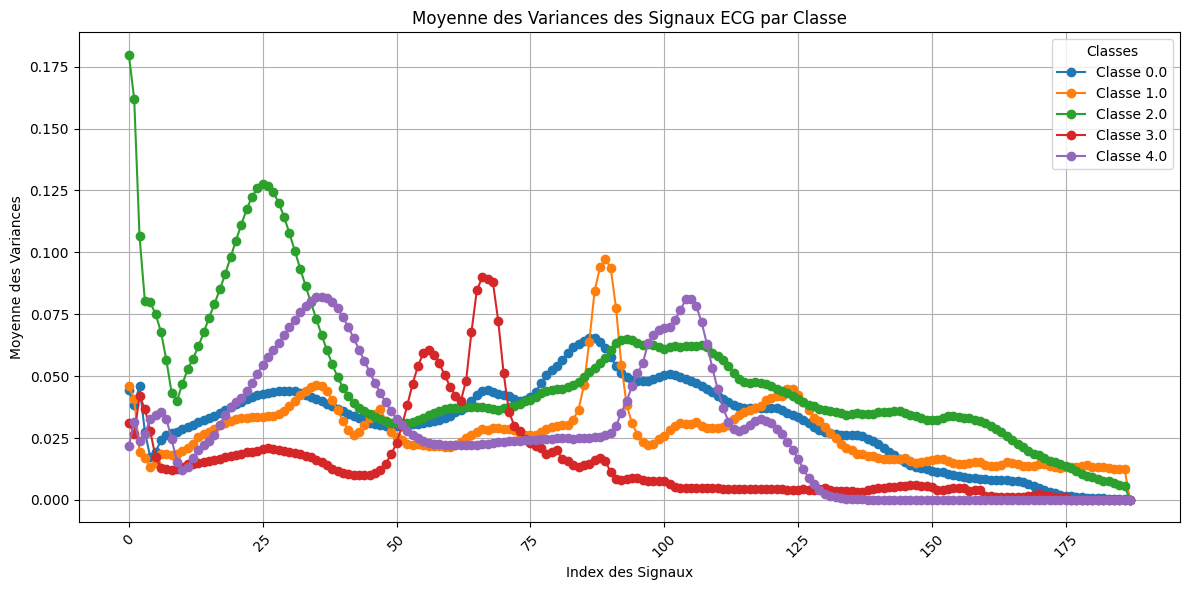

In [45]:
labels = data.iloc[:, -1]

# Calcul de la variance des signaux par classe
variance_signals = data.groupby(labels).var()

# Configuration de la figure
plt.figure(figsize=(12, 6))

# Tracer une courbe pour chaque classe
for class_label in variance_signals.index:
    plt.plot(variance_signals.columns, variance_signals.loc[class_label], marker='o', label=f'Classe {class_label}')

plt.title('Moyenne des Variances des Signaux ECG par Classe')
plt.xlabel('Index des Signaux')
plt.ylabel('Moyenne des Variances')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Classes')
plt.tight_layout()
plt.show()

Tableau de corrélation interclasse 😊
          0.0       1.0       2.0       3.0       4.0
0.0       1.0   0.95993  0.928773  0.843749  0.862087
1.0   0.95993       1.0  0.902478  0.777526  0.835784
2.0  0.928773  0.902478       1.0  0.758974  0.929179
3.0  0.843749  0.777526  0.758974       1.0  0.676887
4.0  0.862087  0.835784  0.929179  0.676887       1.0


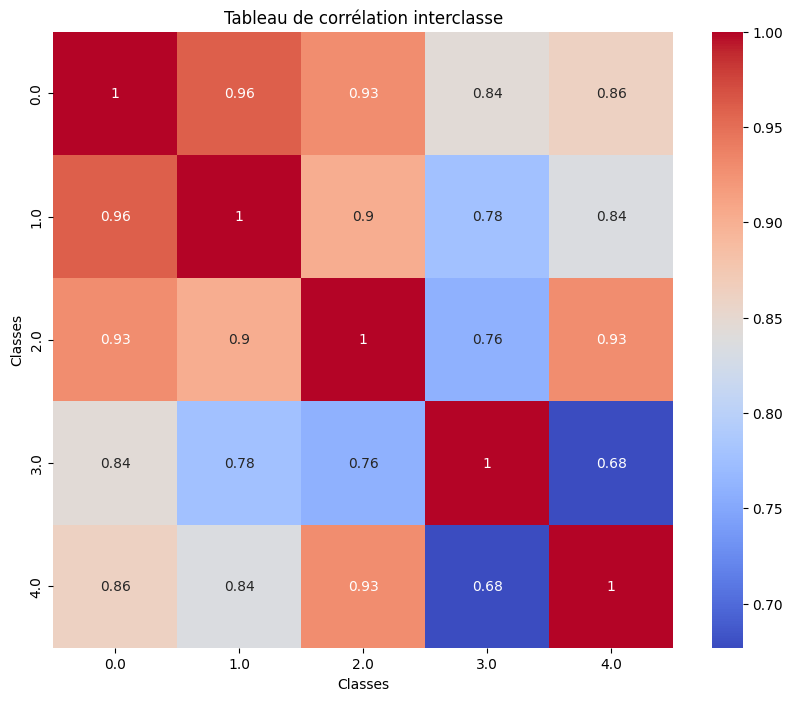

In [57]:
classes = data[187].unique()
correlation_matrix = pd.DataFrame(index=classes, columns=classes)

for class_1 in classes:
    for class_2 in classes:
        # Sélectionner les données pour les deux classes
        signals_1 = data[data[187] == class_1].iloc[:, :-1]  # Tout sauf la colonne de classe
        signals_2 = data[data[187] == class_2].iloc[:, :-1]

        # Calculer la moyenne des signaux pour chaque classe
        mean_signals_1 = signals_1.mean()
        mean_signals_2 = signals_2.mean()

        # Calculer la corrélation entre les moyennes des signaux
        correlation = mean_signals_1.corr(mean_signals_2)
        correlation_matrix.loc[class_1, class_2] = correlation

#Afficher le tableau de corrélation
print("Tableau de corrélation interclasse 😊")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", cbar=True)
plt.title("Tableau de corrélation interclasse")
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()

## Caractéristiques ECG en fonction des maladies

• Supra-ventricular Ectopic Beat (SVEB) = Le cœur bat de façon irrégulière, avec des intervalles parfois plus courts entre les battements.

• Ventricular Ectopic Beat (VEB) = Rythme du cœur irrégulier, avec des battements qui semblent « interrompus ».

• Fusion Beat = Comme si deux battements se « fusionnaient », ce qui donne une forme différente sur l'ECG.

## Placement des Electrodes pour le projet Arduino

• Electrode Positive : Bras gauche

• Electrode Négative : Bras droit

• Electrode de Référence : Poitrine au niveau du sternum